# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore')

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [2]:
data_train = pd.read_csv('PreprocessedData/UCI_CC_train.csv')
data_train.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,0.02,0.314815,0.141434,0.201904,0.284865,0.340651,0.419393,0.278769,0.235939,0.228697,...,0,2,1,2,2,2,2,2,1,1
1,0.00,0.092593,0.088774,0.051116,0.151372,0.218692,0.321427,0.379269,0.032079,0.783208,...,1,1,2,2,1,1,2,2,2,0
2,0.26,0.111111,0.241978,0.327153,0.437523,0.531247,0.674421,0.725578,0.219831,0.532581,...,0,2,2,2,2,2,3,3,3,0
3,0.32,0.148148,0.348188,0.425493,0.498933,0.588023,0.640052,0.713425,0.291626,0.329731,...,1,2,2,2,2,2,2,2,2,0
4,0.16,0.425926,0.258096,0.332566,0.458031,0.575928,0.668831,0.742169,0.000000,0.867638,...,0,2,2,3,4,3,3,3,2,0


In [3]:
data_test = pd.read_csv('PreprocessedData/UCI_CC_test.csv')
data_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
0,0.42,0.166667,0.594409,0.767089,0.756959,0.830450,0.832032,0.759349,0.555478,0.469925,...,0,2,2,2,2,2,2,2,2,0
1,0.12,0.351852,0.351639,0.368577,0.381727,0.448290,0.546885,0.590230,0.221775,0.220395,...,1,1,1,2,2,2,2,2,2,0
2,0.04,0.185185,0.207478,0.275572,0.342656,0.427143,0.517272,0.582324,0.249965,0.313283,...,1,2,2,2,2,2,2,2,2,0
3,0.02,0.037037,0.134908,0.211832,0.288377,0.355373,0.424523,0.485739,0.555478,0.000157,...,1,1,2,2,2,4,3,3,2,0
4,0.08,0.148148,0.198373,0.268969,0.361928,0.458290,0.557672,0.623634,0.201916,0.232456,...,0,1,2,2,2,2,2,2,2,1


# Modelling Phase

## Training Phase

In [4]:
X_train = data_train.drop(['default.payment.next.month'], axis=1)
y_train = data_train['default.payment.next.month']

X_test = data_test.drop(['default.payment.next.month'], axis=1)
y_test = data_test['default.payment.next.month']

In [5]:
# Machine learning model 1 training phase (decision tree gini index)

model_dtgi = DecisionTreeClassifier(criterion='gini')
model_dtgi.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [6]:
# Machine learning model 2 training phase (Random Forest gini index)

model_rfgi = RandomForestClassifier(criterion='gini')
model_rfgi.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# Machine learning model 3 training phase (Gradient boosting)

model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Testing Phase

In [8]:
# Machine learning model 1 testing phase (decision tree)

pred_dtgi = model_dtgi.predict(X_test)
pred_dtgi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
pd.DataFrame({'Aktual':y_test,'DTGI':pred_dtgi})

,Aktual,DTGI
0,0,0
1,0,0
2,0,0
3,0,1
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [10]:
# Machine learning model 2 testing phase (random forest)

pred_rfgi = model_rfgi.predict(X_test)
pred_rfgi

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
pd.DataFrame({'Aktual':y_test,'RFGI':pred_rfgi})

,Aktual,RFGI
0,0,0
1,0,0
2,0,0
3,0,1
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [12]:
# Machine learning model 3 testing phase (gradient boosting)

pred_gb = model_gb.predict(X_test)
pred_gb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
pd.DataFrame({'actual':y_test,'GB':pred_gb})

,actual,GB
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


## Optimization Phase

In [14]:
# Machine learning optimization phase

from sklearn.model_selection import RandomizedSearchCV

In [15]:
X = X_train.append(X_test)
y = y_train.append(y_test)

In [16]:
X = X.values
y = y.values

In [17]:
# Machine learning model 1 optimization phase (randomized search for decision tree)

from scipy.stats import randint as sp_randint

In [18]:
dtgi_tuned_params = {   "max_depth": sp_randint(1, 4),
                      "min_samples_leaf"  : sp_randint(2, 11),
                      'min_samples_split' : sp_randint(2, 11)}
# you can change it
n_iter_search = 20
random_search = RandomizedSearchCV(model_dtgi, dtgi_tuned_params,
                                   n_iter = n_iter_search, cv=10)

random_search.fit(X, y)
print("Best Params : ",random_search.best_params_,"\n")
best_dtgi = random_search.best_params_

means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 7} 

0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 7}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 8, 'min_samples_split': 5}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 9, 'min_samples_split': 5}
0.777 (+/-0.017) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 7}
0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2}
0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 8}
0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.775 (+/-0.020) for {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 3}
0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.775 (+/-0.020) for {'max_depth': 2, 'min_samples_leaf': 7, 'min_samples_split': 7}
0.777 (+/-0.017) for {'max_depth': 3, 'min_samples_leaf': 7, 'min_s

In [19]:
model_dtgi2 = DecisionTreeClassifier(criterion='gini', max_depth= best_dtgi['max_depth'], min_samples_leaf= best_dtgi['min_samples_leaf'], min_samples_split= best_dtgi['min_samples_split'])

In [20]:
model_dtgi2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
model_dtgi2.predict(X_test)
model_dtgi2.score(X_test,y_test)

0.7832988267770876

In [22]:
# Machine learning model 2 optimization phase (randomized search for random forest)

rfgi_tuned_params = {   "max_depth": sp_randint(1, 4),
                      "min_samples_leaf"  : sp_randint(2, 11),
                      'min_samples_split' : sp_randint(2, 11)}
# you can change it
n_iter_search = 20
random_search = RandomizedSearchCV(model_rfgi, rfgi_tuned_params,
                                   n_iter = n_iter_search, cv=10)

random_search.fit(X, y)
print("Best Params : ",random_search.best_params_,"\n")
best_rfgi = random_search.best_params_

means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 5} 

0.762 (+/-0.014) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 4}
0.756 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.764 (+/-0.018) for {'max_depth': 3, 'min_samples_leaf': 9, 'min_samples_split': 5}
0.754 (+/-0.017) for {'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 6}
0.762 (+/-0.012) for {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.736 (+/-0.026) for {'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 8}
0.740 (+/-0.030) for {'max_depth': 1, 'min_samples_leaf': 2, 'min_samples_split': 4}
0.739 (+/-0.032) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.758 (+/-0.015) for {'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 7}
0.740 (+/-0.034) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 10}
0.761 (+/-0.017) for {'max_depth': 3, 'min_samples_leaf': 10, 'm

In [23]:
model_rfgi2 = RandomForestClassifier(criterion='gini', max_depth= best_rfgi['max_depth'], min_samples_leaf= best_rfgi['min_samples_leaf'], min_samples_split= best_rfgi['min_samples_split'])

In [24]:
model_rfgi2.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model_rfgi2.predict(X_test)
model_rfgi2.score(X_test,y_test)

0.7767425810904072

In [26]:
# Machine learning model 3 optimization phase (randomized search for gradient boosting)

gb_tuned_params = {   "max_depth": sp_randint(1, 4),
                      "min_samples_leaf"  : sp_randint(2, 11),
                      'min_samples_split' : sp_randint(2, 11)}
# you can change it
n_iter_search = 20
random_search = RandomizedSearchCV(model_gb, gb_tuned_params,
                                   n_iter = n_iter_search, cv=5)

random_search.fit(X, y)
print("Best Params : ",random_search.best_params_,"\n")
best_gb = random_search.best_params_

means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, random_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))

Best Params :  {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 10} 

0.775 (+/-0.016) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.774 (+/-0.015) for {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.775 (+/-0.016) for {'max_depth': 2, 'min_samples_leaf': 8, 'min_samples_split': 9}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 6, 'min_samples_split': 5}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 10, 'min_samples_split': 2}
0.775 (+/-0.014) for {'max_depth': 2, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 3, 'min_samples_split': 6}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 4}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 5, 'min_samples_split': 7}
0.774 (+/-0.015) for {'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 10}
0.773 (+/-0.015) for {'max_depth': 1, 'min_samples_leaf': 10, 'm

In [27]:
model_gb2 = GradientBoostingClassifier(max_depth= best_gb["max_depth"], min_samples_leaf= best_gb["min_samples_leaf"], min_samples_split= best_gb["min_samples_split"])

In [28]:
model_gb2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=8, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
model_gb2.score(X_test,y_test)

0.7805383022774327

## Ensamble Phase (optional)

RandomForest dan GradientBoosting adalah ensamble learning dari DecisionTree

<hr>

# Evaluation

From data modeling that has been done, please state your evaluation/conclusion related to:

1. Our dataset behaviour (how our prediction characteristic & trend)
2. Model Analysis, including their parameter & performance
3. Result after optimization phase
4. Relate your analysis with EDA & preprocessing that you have done before
5. Another improvement that must be done to increase your model performance

In [30]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG, display
from graphviz import Source

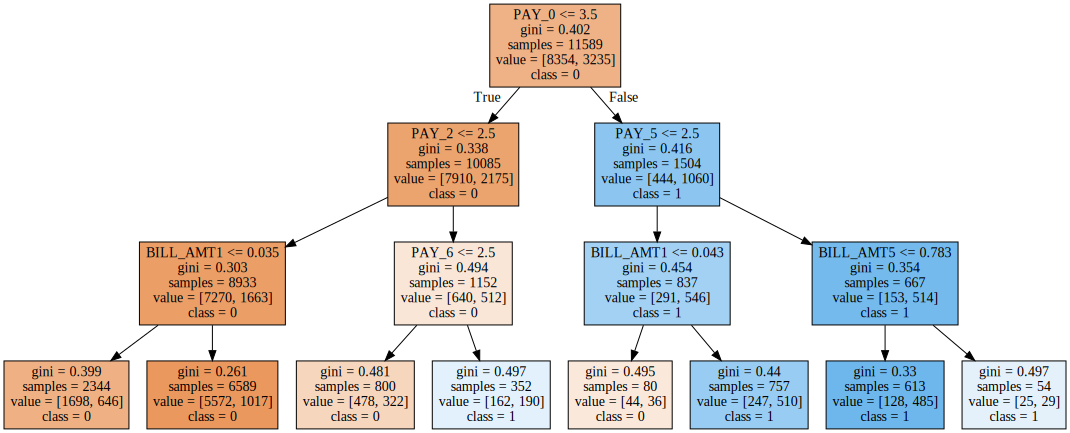

In [31]:
# Dataset behaviour

labels = X_train.columns
graph = Source(tree.export_graphviz(model_dtgi2,
out_file = None, feature_names = labels 
                , class_names = ['0', '1']
                , filled = True))

display(SVG(graph.pipe(format='svg')))

In [32]:
# Model analysis

print("Decision Tree Gini Index")
print("Akurasi : ", model_dtgi.score(X_test,y_test)*100,"%\n")

print("Random Forest Gini Index")
print("Akurasi : ", model_rfgi.score(X_test,y_test)*100,"%\n")

print("Gradient Boosting")
print("Akurasi : ", model_gb.score(X_test,y_test)*100,"%\n")

modscore = [model_dtgi.score(X_test,y_test),\
           model_rfgi.score(X_test,y_test),\
           model_gb.score(X_test,y_test)]
maxim = max(modscore)
model = ["Decision Tree Gini Index","Random Forest Gini Index","Gradient Boosting"]

print("Model dengan hasil terbaik sebelum dilakukan optimasi adalah ",model[modscore.index(maxim)]," dengan akurasi ", maxim*100,"%\n")

Decision Tree Gini Index
Akurasi :  68.04692891649412 %

Random Forest Gini Index
Akurasi :  75.39682539682539 %

Gradient Boosting
Akurasi :  77.7432712215321 %

Model dengan hasil terbaik sebelum dilakukan optimasi adalah  Gradient Boosting  dengan akurasi  77.7432712215321 %



In [33]:
# Result after optimization phase

print("Decision Tree Gini Index")
print("Akurasi : ", model_dtgi2.score(X_test,y_test)*100,"%\n")

print("Random Forest Gini Index")
print("Akurasi : ", model_rfgi2.score(X_test,y_test)*100,"%\n")

print("Gradient Boosting")
print("Akurasi : ", model_gb2.score(X_test,y_test)*100,"%\n")

modscore2 = [model_dtgi2.score(X_test,y_test),\
           model_rfgi2.score(X_test,y_test),\
           model_gb2.score(X_test,y_test)]
maxim2 = max(modscore2)
model = ["Decision Tree Gini Index","Random Forest Gini Index","Gradient Boosting"]

print("Model dengan hasil terbaik setelah dilakukan optimasi adalah ",model[modscore2.index(maxim2)]," dengan akurasi ", maxim2*100,"%\n")

Decision Tree Gini Index
Akurasi :  78.32988267770877 %

Random Forest Gini Index
Akurasi :  77.67425810904072 %

Gradient Boosting
Akurasi :  78.05383022774328 %

Model dengan hasil terbaik setelah dilakukan optimasi adalah  Decision Tree Gini Index  dengan akurasi  78.32988267770877 %



**# EDA & preprocessing relation analysis**

Penggunaan EDA & preprocessing membuat model menjadi lebih baik. Hal ini karena outlier telah dikurangi pada tahap ini. Selain itu, data juga telah dinormalisasi menggunakan MinMax scaler untuk data numerik dan LabelEncoder untuk data kategori.

**# Another improvement**

Tidak ada